# EDA (Exploratory Data Analysis)

## Exploring Daily Statistics for Trending YouTube Videos

**OBJECTIVE OF THIS PROJECT**  
Here I will perform an EDA on daily statistics for trending YouTube videos.
The questions to answers are: number of views, likes, dislikes of the most popular trending videos has in the past.

Set-up your working environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Setting style for plots
plt.style.use('fivethirtyeight') 

# Step 1: Reading the file

In [3]:
# reading in csv file and displaying first 5 rows of dataset
df = pd.read_csv("data/DEvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [5]:
# checking which columns are included in the dataframe
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

Here are the explanations of the individual variables (column names):


| Column name | Description |
| --- | ----------- |
| video_id | Unique identifier for each uploaded video|
| trending_date | Date on which this video was trending|
| title | Video title|
| channel_title | Name of YouTube channel |
| category_id  | Category video belongs to |
| publish_time| Date and time, video was published |
| tags| Tags used for this video|
| views | Number of views |
| likes | Number of likes |
| dislikes | Number of dislikes |
| comment_count | Number of comments |
| thumbnail link | Link to reduced-size versions of pictures or videos |
| comments_disabled | States, if comments were disabled or not |
| ratings_disabled | States, if ratings were disabled or not |
| video_error_or_removed | States, if there was an error or if video was removed |
| description | Description of video content |



In [4]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df.shape

(40840, 16)

There are 40840 rows and 16 columns in the dataset.

In [5]:
# I now want to check out our data-types as well as get a feeling for possible missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bool  
 15  de

# Step 2: Cleaning the data

**Drop columns**  
Since not all columns are interesting, some can be dropped to make the exploration easier.

In [6]:
# drop columns I don't need
df.drop(["tags","thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed", "description"], axis=1, inplace=True)

In [7]:
# check result
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,252786,35885,230,1539
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,797196,53576,302,1278
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97190,6146,12703
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,380247,31821,458,1955
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,822213,100684,2467,10244


**Deal with duplicate rows**  
Let's check if there are videos (with the same video_id) several times in our dataset.

In [8]:
# checking for duplicate rows in video_id column
df["video_id"].duplicated().value_counts()

video_id
False    29627
True     11213
Name: count, dtype: int64

There are 29627 unique videos in the dataset. However, there are 40840 rows in the dataset. This means that some of the videos are duplicated due to the fact that some videos are on the trending list for more than one day. For this project, I will use all rows, 40840.

# Step 3: Transform data types
I will transform trending_date and publish_time into a datetime format. At the moment, there are object types.

In [9]:
# converting trending_date and publish_time into datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_date'] = pd.to_datetime(df['publish_time'].dt.date) #creating a new column with the extract date part from publish_time

In [10]:
# check result
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 17:08:49,252786,35885,230,1539,2017-11-13
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12 22:30:01,797196,53576,302,1278,2017-11-12
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97190,6146,12703,2017-11-13
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12 15:00:01,380247,31821,458,1955,2017-11-12
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12 13:10:36,822213,100684,2467,10244,2017-11-12


**Build new columns/ Feature engineering**  
Since I want to know when most trending videos get published, I need to create new columns which contain information about the day of the week as well as the time of the day.  

In [11]:
# extracting year, month, day of week and hour information out of column publish_time and build new column for each
df["publish_year"]=df["publish_time"].dt.year 
df["publish_month"]=df["publish_time"].dt.month
df["publish_weekday"]=df["publish_time"].dt.dayofweek 
df["publish_hour"]=df["publish_time"].dt.hour 

In [12]:
# check result
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,publish_year,publish_month,publish_weekday,publish_hour
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 17:08:49,252786,35885,230,1539,2017-11-13,2017,11,0,17
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12 22:30:01,797196,53576,302,1278,2017-11-12,2017,11,6,22
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97190,6146,12703,2017-11-13,2017,11,0,7


Let's also do this for the trending date.

In [13]:
# extracting year, month, day-of-week out of column trending_date and build new column for each
df["trending_year"]=df["trending_date"].dt.year
df["trending_month"]=df["trending_date"].dt.month
df["trending_weekday"]=df["trending_date"].dt.dayofweek

In [14]:
# check result
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,publish_year,publish_month,publish_weekday,publish_hour,trending_year,trending_month,trending_weekday
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 17:08:49,252786,35885,230,1539,2017-11-13,2017,11,0,17,2017,11,1
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12 22:30:01,797196,53576,302,1278,2017-11-12,2017,11,6,22,2017,11,1
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97190,6146,12703,2017-11-13,2017,11,0,7,2017,11,1


I want to know what categories have most of the trending videos. For this I will transform them into actual category names.

In [15]:
# I create a  dictionary called category_names with category_id as key and the actual category name as value
# Source: https://gist.github.com/dgp/1b24bf2961521bd75d6c

category_names = {
    1:'Film and Animation',
    2:'Autos & Vehicles',
    10:'Music',
    15:'Pets and Animals',
    17:'Sports',
    18:'Short Movies',
    19:'Travel and Events',
    20:'Gaming',
    21:'Videoblogging',
    22:'People and Blogs',
    23:'Comedy',
    24:'Entertainment',
    25:'News and Politics',
    26:'How to and Style',
    27:'Education',
    28:'Science and Technology',
    29:'Non Profits and Activism',
    30:'Movies',
    31:'Anime/Animation', 
    32:'Action/Adventure',
    33:'Classics',
    34:'Comedy', 
    35:'Documentary',
    36:'Drama',
    37:'Family',
    38:'Foreign',
    39:'Horror',
    40:'Sci-Fi/Fantasy',
    41:'Thriller',
    42:'Shorts',
    43:'Shows',
    44:'Trailers'
    }

In [16]:
# Adding a new column called category_name which contains the name of the category the video belongs to
df['category_name'] = df['category_id'].map(category_names)

In [17]:
# check result
df[["title", "category_id", "category_name"]].head()

,title,category_id,category_name
0,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,24,Entertainment
1,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,23,Comedy
2,The Trump Presidency: Last Week Tonight with J...,24,Entertainment
3,Das Fermi-Paradoxon,27,Education
4,18 SONGS mit Kelly MissesVlog (Sing-off),24,Entertainment


#### Days between publishing and trending
Let's have a look at the time-interval between video-publication-date and the trending_date.

In [18]:
# creating new column called trending_days_difference
df['trending_days_difference']=(df["trending_date"]-df["publish_date"]).dt.days

In [19]:
# check result
df[["trending_date", "publish_date", "trending_days_difference"]].head()

,trending_date,publish_date,trending_days_difference
0,2017-11-14,2017-11-13,1
1,2017-11-14,2017-11-12,2
2,2017-11-14,2017-11-13,1
3,2017-11-14,2017-11-12,2
4,2017-11-14,2017-11-12,2


# Step 4: Descriptive Statistics
Let's have a look at our numerical variables and their descriptive statistics.

In [20]:
df[["views", "likes", "dislikes", "comment_count", "trending_days_difference"]].describe()

,views,likes,dislikes,comment_count,trending_days_difference
count,"40,840.00","40,840.00","40,840.00","40,840.00","40,840.00"
mean,"603,455.32","21,875.50","1,397.14","2,785.86",1.85
std,"2,348,962.77","101,800.00","14,577.38","17,458.03",19.62
min,518.00,0.00,0.00,0.00,0.00
25%,"27,068.75",533.00,29.00,79.00,1.00
50%,"119,277.00","2,699.00",134.00,376.00,1.00
75%,"443,101.50","11,796.25",532.00,"1,376.00",2.00
max,"113,876,217.00","4,924,056.00","1,470,386.00","1,084,435.00","2,046.00"


In [21]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'views', 'likes', 'dislikes', 'comment_count',
       'publish_date', 'publish_year', 'publish_month', 'publish_weekday',
       'publish_hour', 'trending_year', 'trending_month', 'trending_weekday',
       'category_name', 'trending_days_difference'],
      dtype='object')

In [22]:
print("--------- video mit max views -----------------")
display(df[df['views'] == df['views'].max()][['title', 'publish_time', 'views', 'likes', 'comment_count', 'publish_weekday', 'category_name', 'trending_days_difference']])

print("--------- video mit max likes -----------------")
display(df[df['likes'] == df['likes'].max()][['title', 'publish_time', 'views', 'likes', 'comment_count', 'publish_weekday', 'category_name']])

print("--------- video mit max dislikes -----------------")
display(df[df['dislikes'] == df['dislikes'].max()][['title', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count', 'publish_weekday', 'category_name']])


print("--------- video mit max comments -----------------")
display(df[df['comment_count'] == df['comment_count'].max()][['title', 'publish_time', 'views', 'likes', 'comment_count', 'publish_weekday', 'category_name']])


print("--------- channel mit max views -----------------")
display(df[df['views'] == df['views'].max()][['title', 'publish_time', 'views', 'likes', 'comment_count', 'publish_weekday', 'category_name']])


--------- video mit max views -----------------


,title,publish_time,views,likes,comment_count,publish_weekday,category_name,trending_days_difference
5455,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-06 17:58:51,113876217,2811217,787174,2,Entertainment,5


--------- video mit max likes -----------------


,title,publish_time,views,likes,comment_count,publish_weekday,category_name
36291,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-18 09:00:02,73463137,4924056,1084435,4,Music


--------- video mit max dislikes -----------------


,title,publish_time,views,likes,dislikes,comment_count,publish_weekday,category_name
5455,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-06 17:58:51,113876217,2811217,1470386,787174,2,Entertainment


--------- video mit max comments -----------------


,title,publish_time,views,likes,comment_count,publish_weekday,category_name
36291,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-18 09:00:02,73463137,4924056,1084435,4,Music


--------- channel mit max views -----------------


,title,publish_time,views,likes,comment_count,publish_weekday,category_name
5455,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-06 17:58:51,113876217,2811217,787174,2,Entertainment


In [23]:
df['category_name'].value_counts()

category_name
Entertainment               15292
People and Blogs             5988
News and Politics            2935
Sports                       2752
Comedy                       2534
Film and Animation           2376
Music                        2372
How to and Style             1745
Gaming                       1565
Autos & Vehicles              873
Education                     844
Science and Technology        806
Non Profits and Activism      256
Pets and Animals              251
Travel and Events             141
Shows                         107
Movies                          2
Trailers                        1
Name: count, dtype: int64

In [24]:
print("--------- video mit max tredding days -----------------")
display(df[df['trending_days_difference'] == df['trending_days_difference'].max()]
        [['title', 'channel_title', 'dislikes', 'publish_time', 'views', 'likes', 'comment_count', 'publish_weekday',
           'category_name', 'trending_days_difference']])


--------- video mit max tredding days -----------------


,title,channel_title,dislikes,publish_time,views,likes,comment_count,publish_weekday,category_name,trending_days_difference
2060,Kriminelle Großfamilien in Berlin - Interview ...,GehirnerweichungNein,1,2012-04-18 10:58:15,11373,90,6,2,News and Politics,2046


# Step 5: Insights so far

1.  The most viewed video is also the most disliked video (YT Rewind 2017)
2.  The most commented video is also the most liked (BTS Fake Love)
3.  Entertainment is the most used category, followed by People and Blogs, News and Politics. The least: Trailers.
4.  'Kriminelle Großfamilien in Berlin' holds the most days in trending: 2046. With a viewing numbers of 11 373, its engagement does not reflect
    its popularity: Likes only 90, 6 comments and only 1 dislike.
5. A trending video has on average 603.455 views, 21.875 likes, 1.397 dislikes and 2.785 comments
6. On average the time between the video is published and the video is trending is 1,85 days
7. The median value for the number of views is 119.277 which means that half of the trending videos have views that are less than that number, and the other half have views larger than that number. The same is true for the median of likes, dislikes, comment_count and trending_days_difference

# Step 6: Hypotheses

After the EDA, I will state some hypotheses and then test with the data to see if they can be confirmed or rejected.

##  Hypotheses

1. Video-Categories differ in amount of trending videos, views, likes and dislikes
2. For certain categories it takes longer to become a trending video after publication than for other categories
3. Some YouTube channels are more successful than others
4. The amount of video publications differ per day and hour
5. Correlations exist between views, likes, dislikes and comments
6. The length of time-interval between the date a video gets published and a video becomes trending also is correlated to number of views, likes, dislikes and comments

**1. Video-Categories differ in amount of trending videos, views, likes and dislikes**  
**2. For certain categories it takes longer to become a trending video after publication than for other categories**

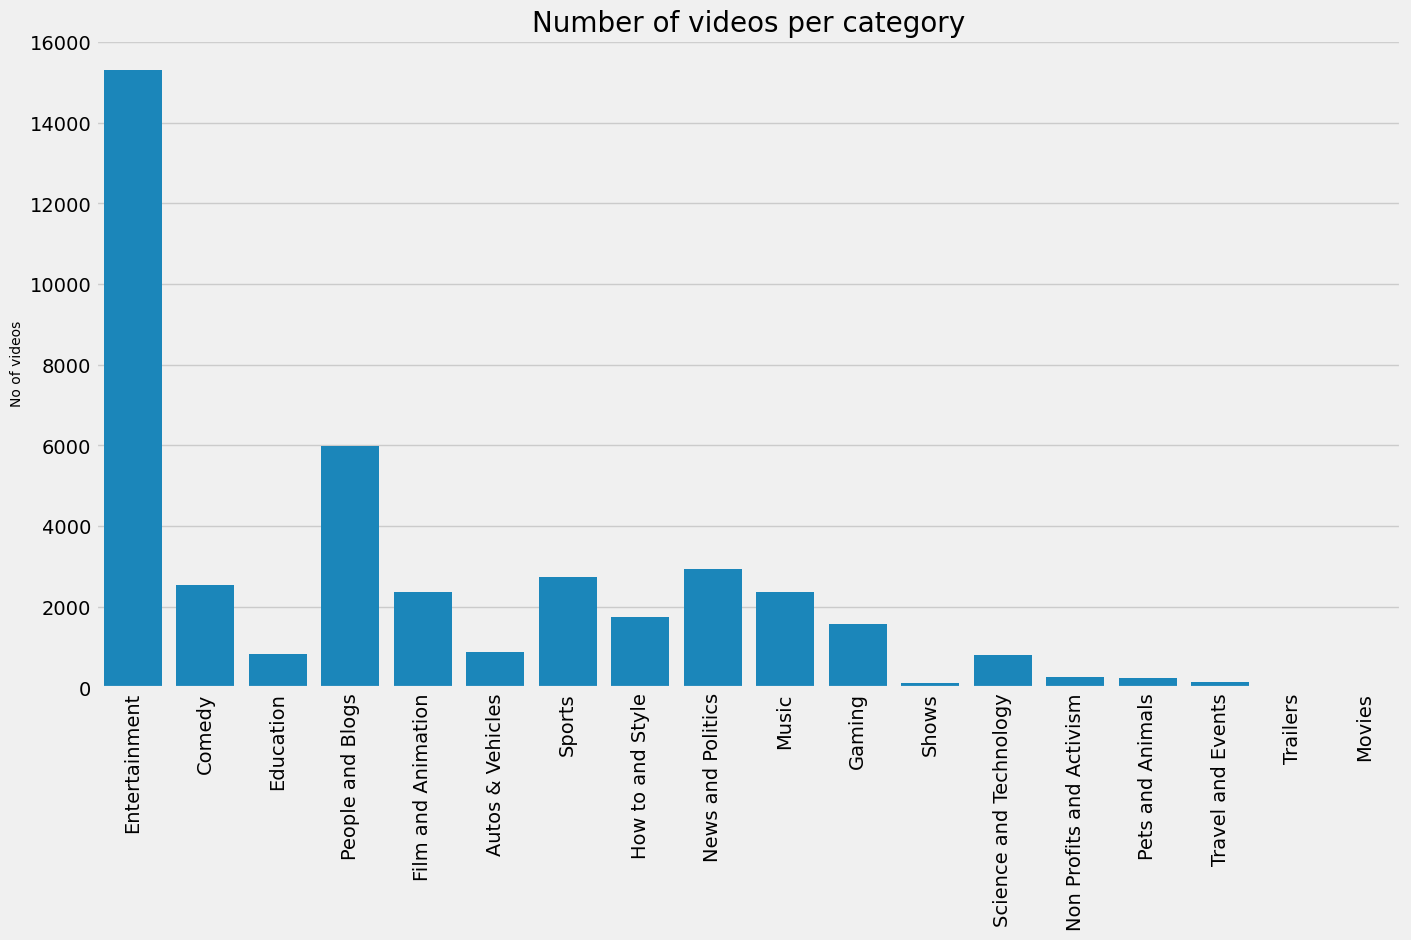

In [26]:
# Number of videos per category
plt.figure(figsize=(15,8))
f1 = sns.countplot(x=df['category_name']) 
f1.tick_params(axis='x', rotation=90) 
f1.set(xlabel=None) 
f1.set_ylabel("No of videos", fontsize = 10); 
f1.set_title('Number of videos per category', fontsize=20); 

The most trending videos belong to the entertainment category, follow by People and Blogs and then Music.

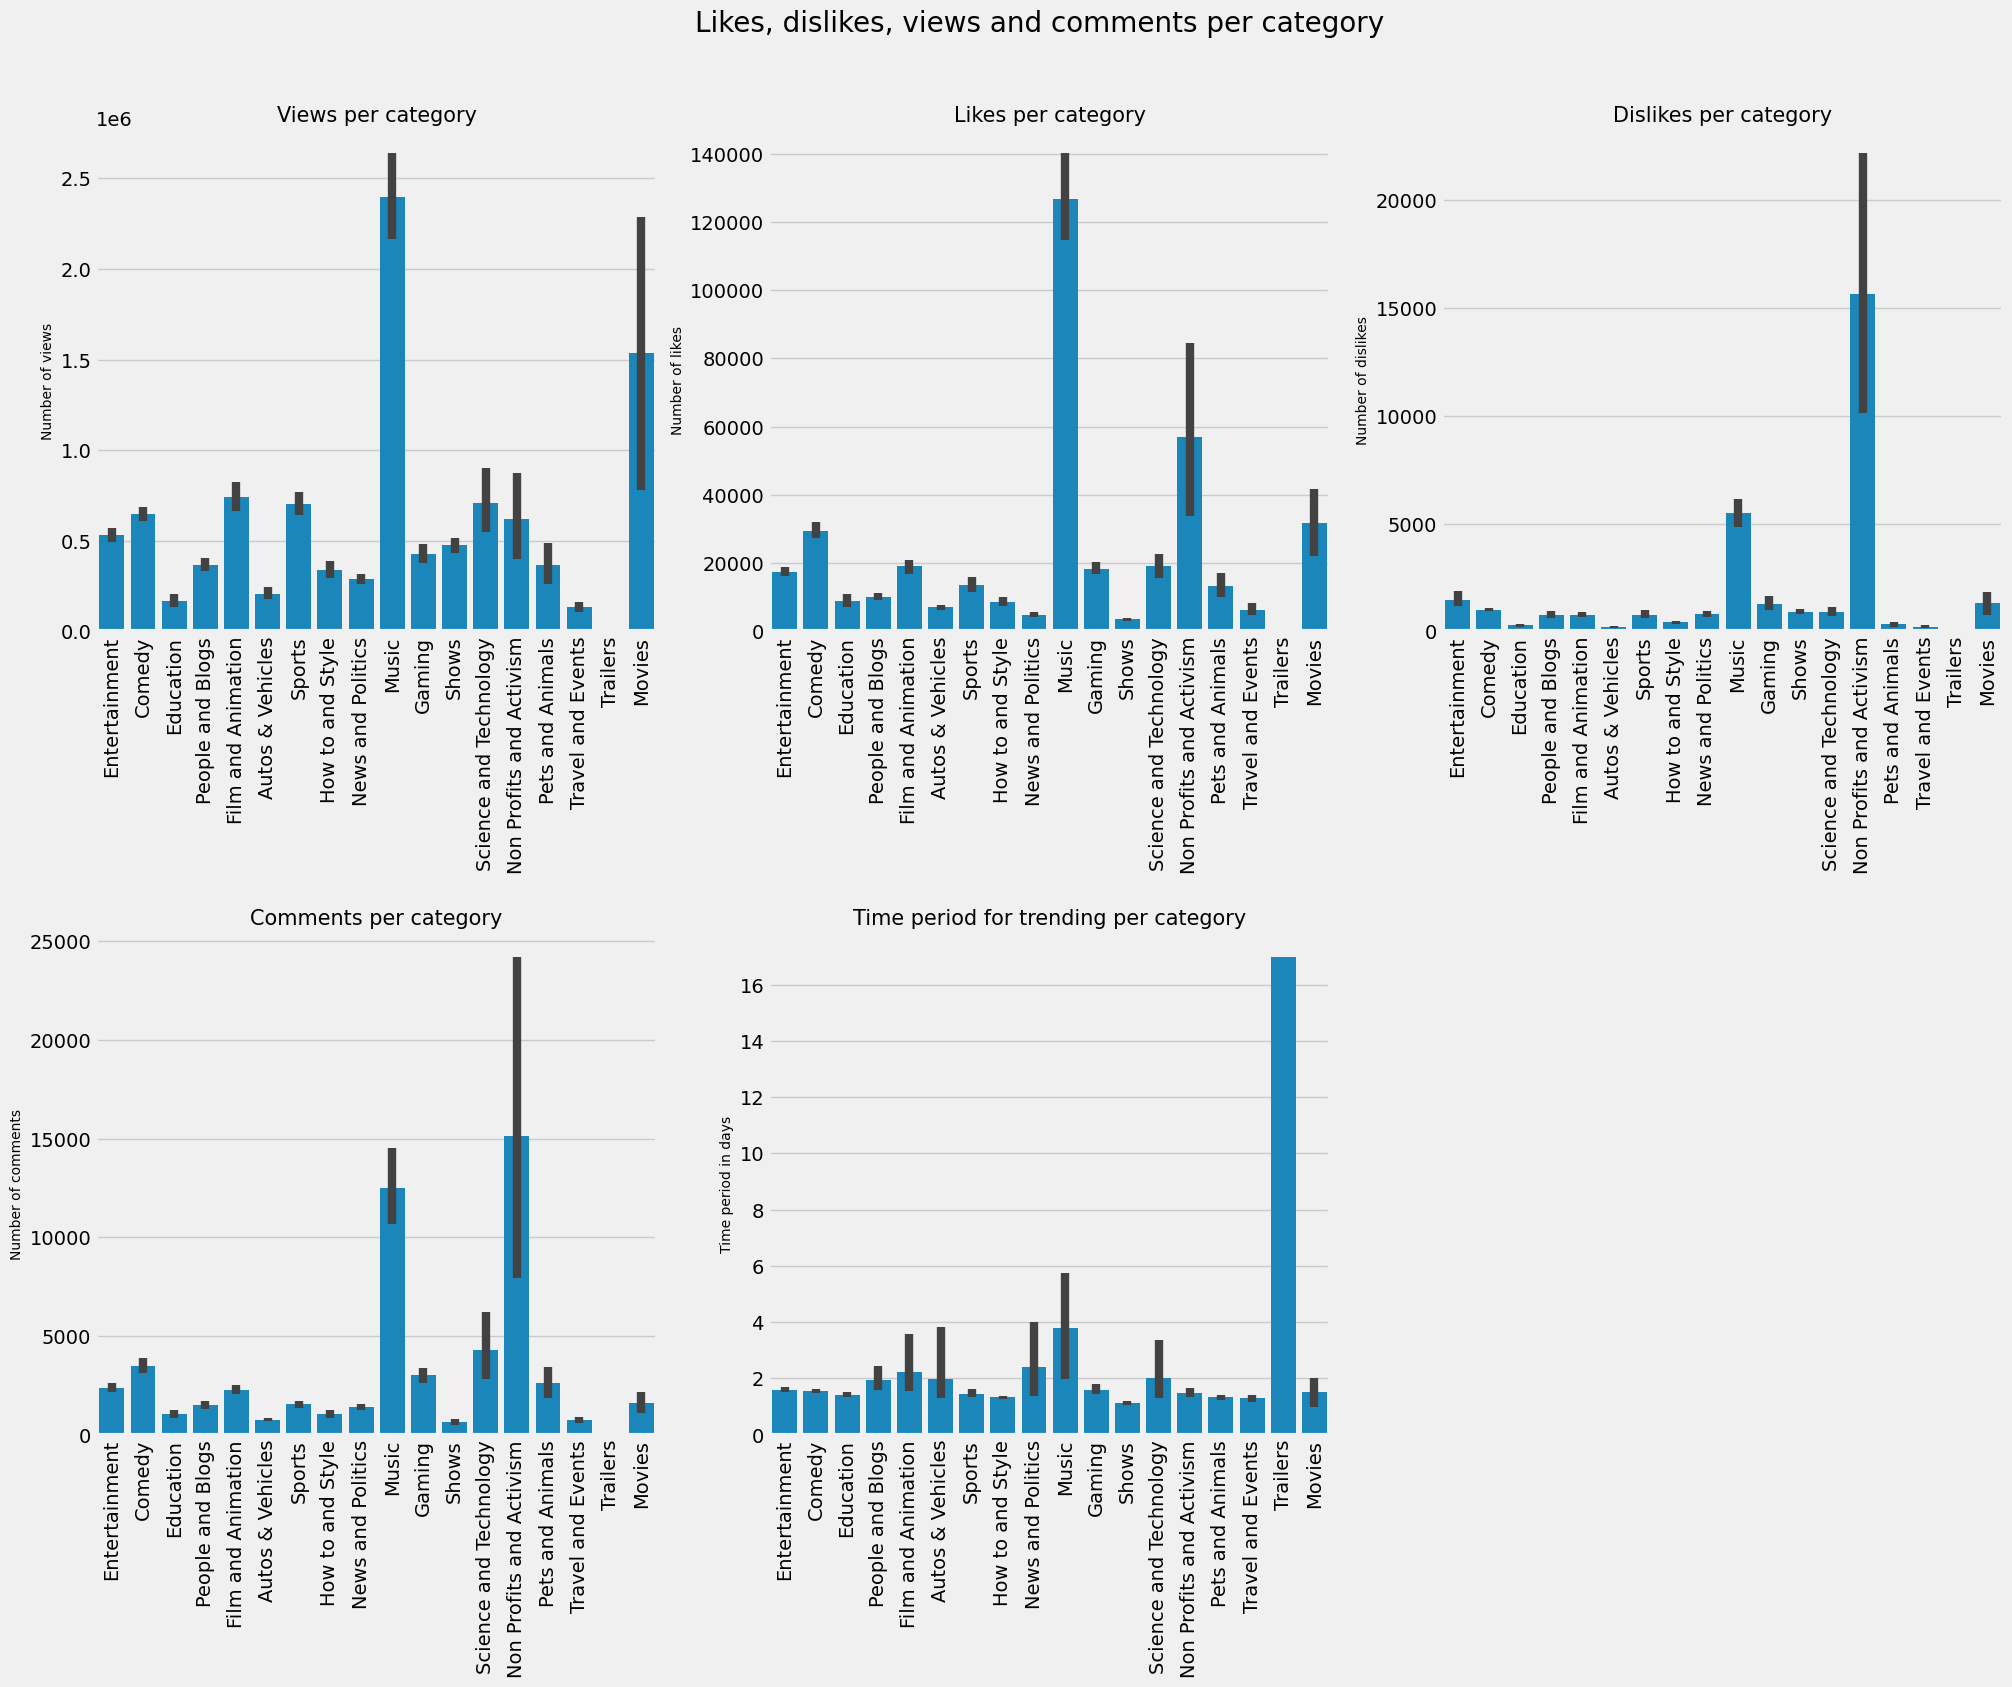

In [27]:
# Views, likes, dislikes and comments per category
fig, ax = plt.subplots(2,3, figsize=(20,15)) 
plt.suptitle('Likes, dislikes, views and comments per category', fontsize=20) 
fig.tight_layout() 
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9)

f1 = sns.barplot(x=df["category_name"], y = df['views'], ax=ax[0,0]) 
f1.tick_params(axis='x', labelrotation=90) 
f1.set(xlabel=None) 
f1.set_ylabel("Number of views", fontsize = 10) 
f1.set_title("Views per category", fontsize = 15);  

f2= sns.barplot(x=df["category_name"], y = df['likes'], ax=ax[0,1])
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("Number of likes", fontsize = 10)
f2.set_title("Likes per category", fontsize = 15);

f3 = sns.barplot(x=df["category_name"], y = df['dislikes'], ax=ax[0,2])
f3.tick_params(axis='x', labelrotation=90)
f3.set(xlabel=None)
f3.set_ylabel("Number of dislikes", fontsize = 10)
f3.set_title("Dislikes per category", fontsize = 15);

f4 = sns.barplot(x=df["category_name"], y = df['comment_count'], ax=ax[1,0])
f4.tick_params(axis='x', labelrotation=90)
f4.set(xlabel=None)
f4.set_ylabel("Number of comments", fontsize = 10)
f4.set_title("Comments per category", fontsize = 15);

f5 = sns.barplot(x=df["category_name"], y = df['trending_days_difference'], ax=ax[1,1])
f5.tick_params(axis='x', labelrotation=90)
f5.set(xlabel=None)
f5.set_ylabel("Time period in days", fontsize = 10)
f5.set_title("Time period for trending per category", fontsize = 15);

fig.delaxes(ax[1][2]);

Although music is the third category with the most trending videos, they have the most viewed and liked videos as well as the second most comments.  
It is surprising though that the category with the most trending videos (Entertainment) does not have the highest number of likes, views and comments.  

The time period for music videos to get trending is in comparison quite high.

**3.Some YouTube channels are more successful than others**

I will have a look at the YouTube channels which have published the most trending videos.

In [28]:
# Top5 channels across all categories
df['channel_title'].value_counts().head()

channel_title
Galileo           200
Ruhrpottwache     185
Анатолий Шарий    182
Çukur             180
Auf Streife       180
Name: count, dtype: int64

In [29]:
# Top5 channels for category music
df.query("category_name == 'Music'")['channel_title'].value_counts().head()

channel_title
385idéal       45
MrRevillz      33
Kontra K       29
Deutsch Rap    29
netd müzik     28
Name: count, dtype: int64

385idéal seems to publish most trending videos.

**4. The amount of video publications differ per day and hour**

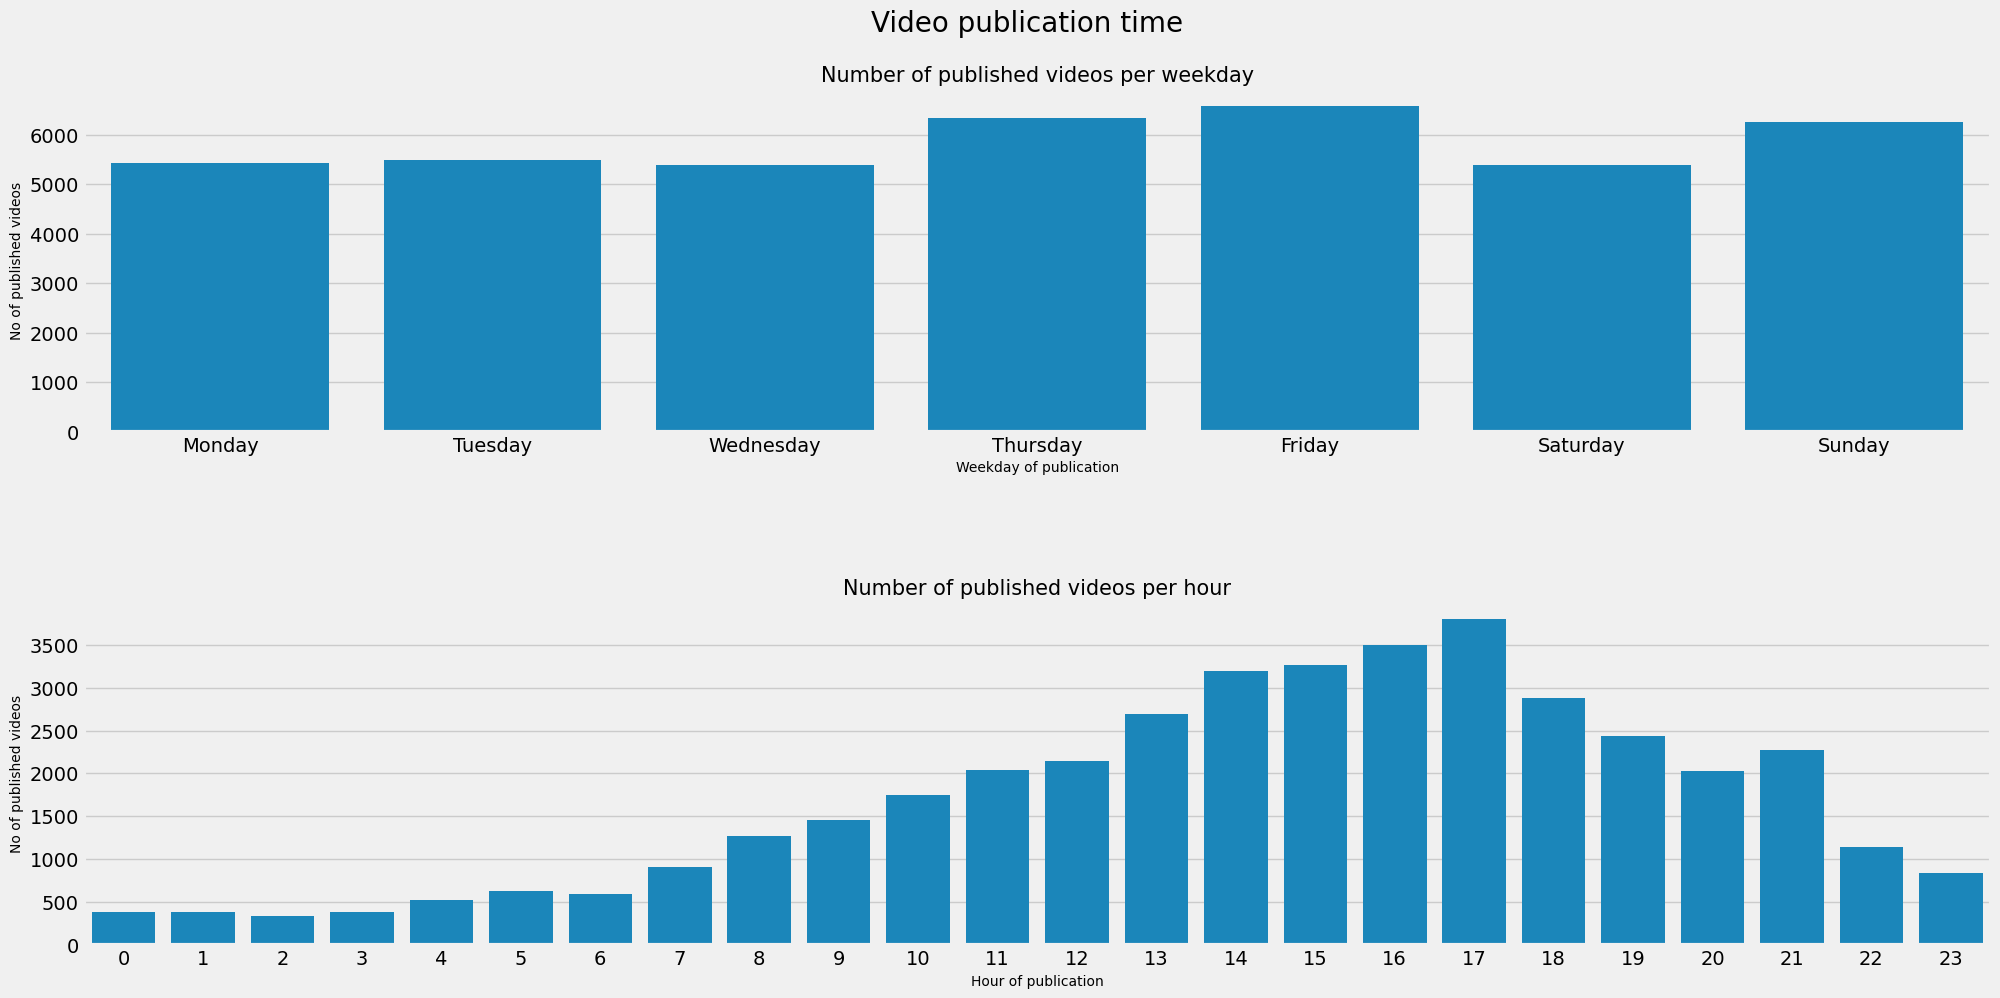

In [30]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.suptitle('Video publication time', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=df['publish_weekday'], ax=ax[0])
f1.set_ylabel("No of published videos", fontsize = 10)
f1.set_xlabel("Weekday of publication", fontsize = 10)
f1.set_xticks([0,1,2,3,4,5,6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of published videos per weekday", fontsize = 15);

f2 = sns.countplot(x=df['publish_hour'], ax=ax[1])
f2.set_ylabel("No of published videos", fontsize = 10)
f2.set_xlabel("Hour of publication", fontsize = 10)
f2.set_title("Number of published videos per hour", fontsize = 15);

On fridays most trending videos got published - looking at the exact time of the day, 5pm is the time, when most trending videos got published.  
Let's do the same analysis only for the music category. 

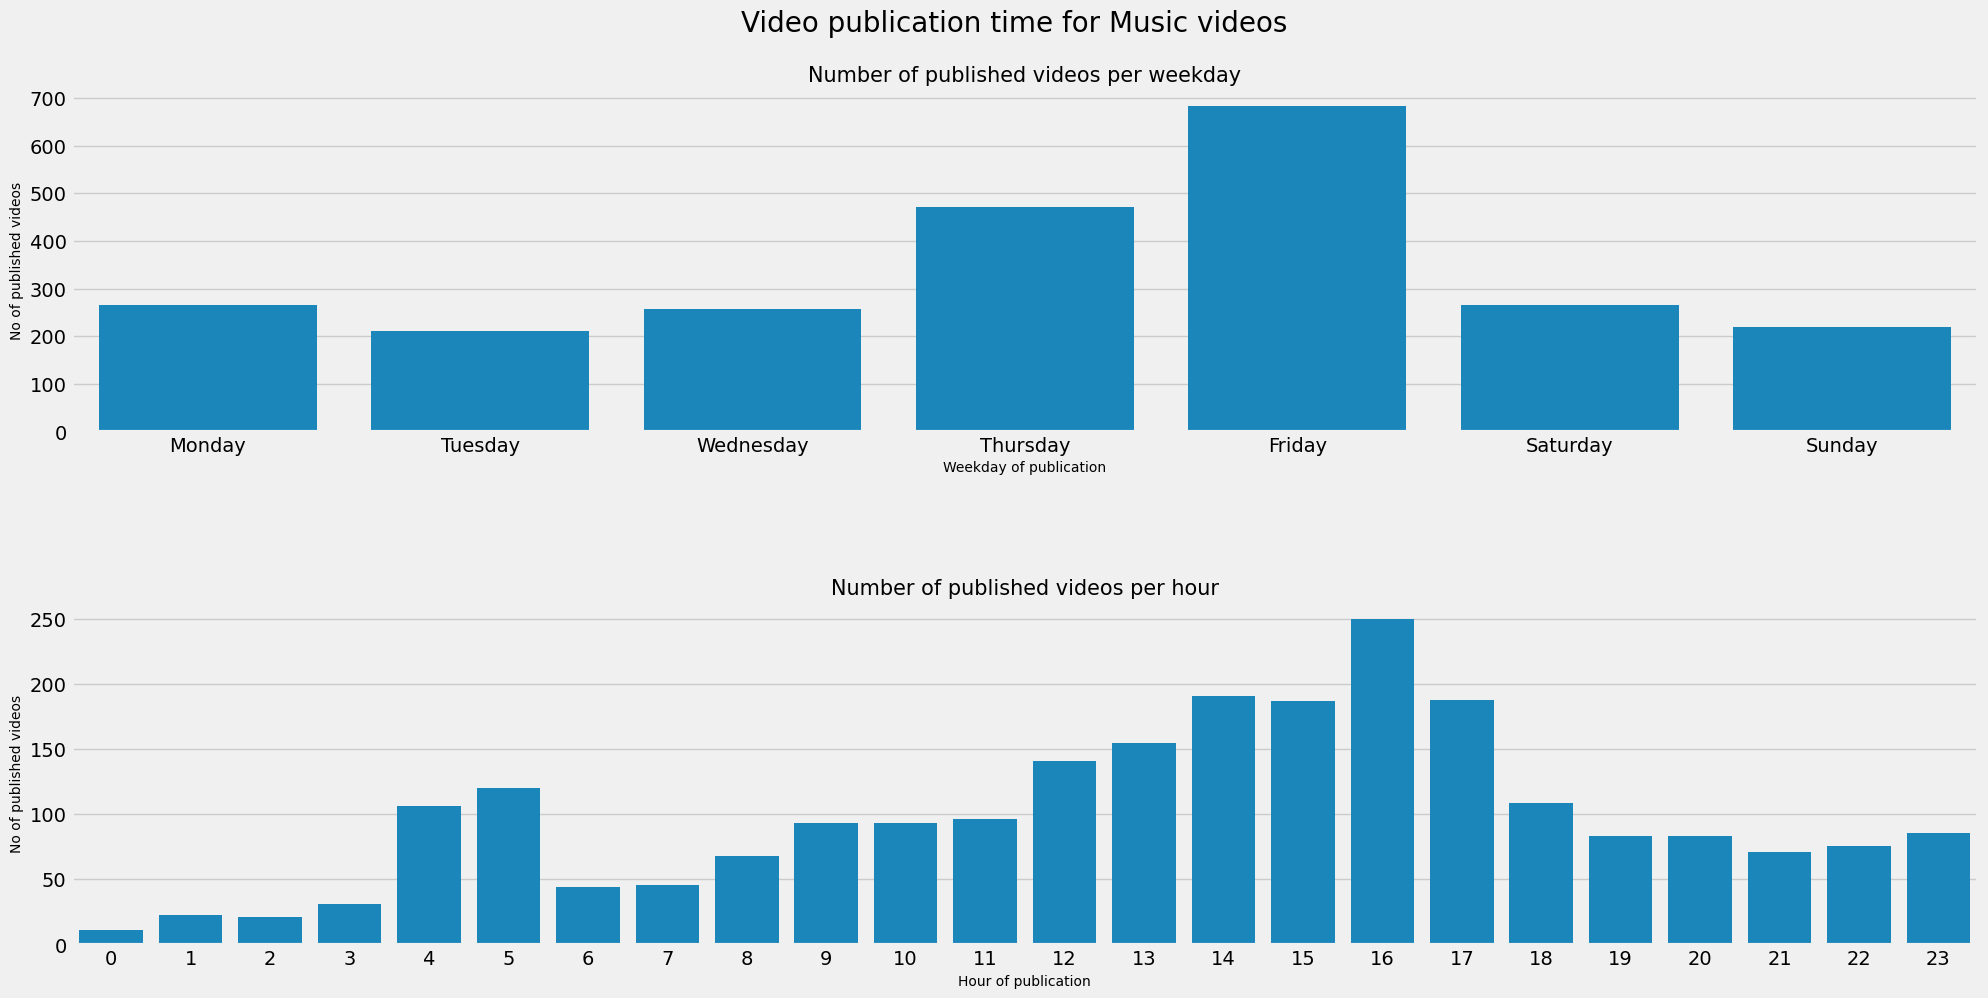

In [31]:
df_music = df.query("category_name == 'Music'")

fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.suptitle('Video publication time for Music videos', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=df_music['publish_weekday'], ax=ax[0])
f1.set_ylabel("No of published videos", fontsize = 10)
f1.set_xlabel("Weekday of publication", fontsize = 10)
f1.set_xticks([0,1,2,3,4,5,6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of published videos per weekday", fontsize = 15);

f2 = sns.countplot(x=df_music['publish_hour'], ax=ax[1])
f2.set_ylabel("No of published videos", fontsize = 10)
f2.set_xlabel("Hour of publication", fontsize = 10)
f2.set_title("Number of published videos per hour", fontsize = 15);

Friday is the day of the week with the highest amount of videos uploaded (almost 700), followed by Thursday (nearly 500). Per hour, 16h seems to be the best time to upload a video.

## Check for correlations

**5. Correlations exist between views, likes, dislikes and comments**  
**6. The length of time-interval between the date a video gets published and a video becomes trending also is correlated to number of views, likes, dislikes and comments**

In [32]:
# correlation matrix between these variables
corr_columns=["views", "likes", "dislikes", "comment_count", "trending_days_difference"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,views,likes,dislikes,comment_count,trending_days_difference
views,1.00,0.82,0.56,0.71,0.01
likes,0.82,1.00,0.46,0.85,0.00
dislikes,0.56,0.46,1.00,0.64,0.00
comment_count,0.71,0.85,0.64,1.00,0.00
trending_days_difference,0.01,0.00,0.00,0.00,1.00


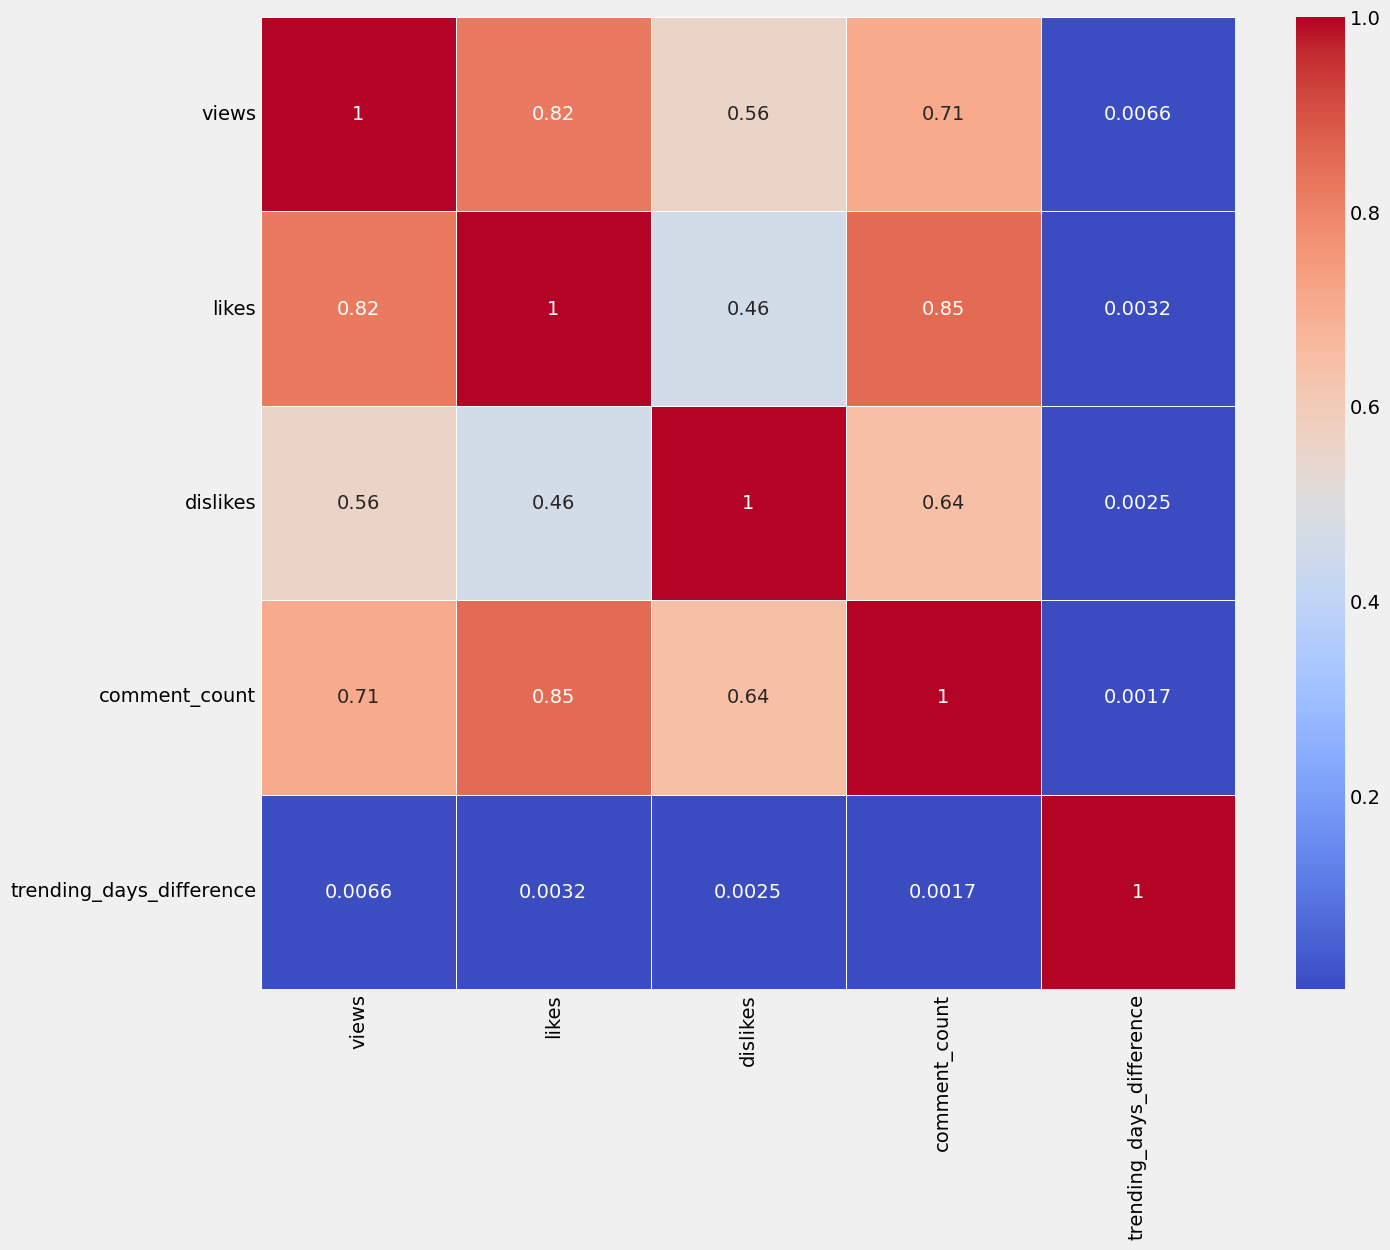

In [33]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

So there are notable positive relationships between
- Views and: Likes and Comments 
- Likes and: Comments
- Dislikes and Comments

There are no relationships between these variables and the time period between publish date and trending date.